# Barplot grouped by “n” variables


In [7]:
pip install cufflinks

Defaulting to user installation because normal site-packages is not writeable
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached narwhals-2.13.0-py3-none-any.whl.metadata (12 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 914.9/914.9 kB 1.2 MB/s eta 0:00:00995.0 kB/s eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 2.1 MB/s eta 0:00:001.9 MB/s eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 4.5 MB/s eta 0:00:000:00:01m eta 0:00:01
Using cached narwhals-2.13.0-py3-none-any.whl (426 kB)
  Created wheel for cufflinks: filename=cufflinks-0.17.3-py3-none-any.whl size=67768 sha256=1a5b2dca3ee57e5e6b33f8f0dbffbcc8a979bad13145492b3f284d35447a33bc
  Stored in directory: /home/rishab/.cache/pip/wheels/e4/0d/21/3611484024347032ee330271868478a2c28877581eb01f9b79
Successfully built cufflinks
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7/7 [cufflinks]━ 6/7 [cufflin

In [1]:
import pandas as pd
import cufflinks as cf
from IPython.display import display, HTML

cf.set_config_file(sharing='public', theme='ggplot', offline=True)

In [2]:
# reading the csv file
df_population_raw = pd.read_csv('population_total.csv')
# dropping null values
df_population_raw.dropna(inplace=True)
# making a pivot table
df_pivot = df_population_raw.pivot(index='year', columns='country',
                                        values='population')
# selecting some countries
df_pivot = df_pivot[['United States', 'India', 'China', 
                          'Indonesia', 'Brazil']]
# showing pivot table
df_pivot

country,United States,India,China,Indonesia,Brazil
year,,,,,
1955.0,171685336.0,4.098806e+08,6.122416e+08,77273425.0,62533919.0
1960.0,186720571.0,4.505477e+08,6.604081e+08,87751068.0,72179226.0
1965.0,199733676.0,4.991233e+08,7.242190e+08,100267062.0,83373530.0
1970.0,209513341.0,5.551898e+08,8.276014e+08,114793178.0,95113265.0
1975.0,219081251.0,6.231029e+08,9.262409e+08,130680727.0,107216205.0
1980.0,229476354.0,6.989528e+08,1.000089e+09,147447836.0,120694009.0
1985.0,240499825.0,7.843600e+08,1.075589e+09,164982451.0,135274080.0
1990.0,252120309.0,8.732778e+08,1.176884e+09,181413402.0,149003223.0
1995.0,265163745.0,9.639226e+08,1.240921e+09,196934260.0,162019896.0


# Lineplot

In [ ]:
Lineplot
df_pivot.iplot(kind='line', xTitle='Years', yTitle='Population', 
               title='Population (1955-2020)')
Barplot
# selecting only one year (2020)
df_pivot_2020 = df_pivot[df_pivot.index.isin([2020])]
# transpose dataframe from rows to columns or viceversa
df_pivot_2020 = df_pivot_2020.T
df_pivot_2020.iplot(kind='bar', color='lightgreen',
                    xTitle='Years', yTitle='Population')
Barplot grouped by “n” variables
# selecting a few years
df_pivot_sample = df_pivot[df_pivot.index.isin([1980, 1990, 2000, 2010, 2020])]
df_pivot_sample.iplot(kind='bar')
Piechart
# changing column name 
df_pivot_2020.rename(columns={2020:'2020'}, inplace=True)
df_pivot_2020 = df_pivot_2020.reset_index()
df_pivot_2020.iplot(kind='pie', values='2020', labels='country')
Boxplot
df_pivot['United States'].iplot(kind='box', color='green',
                                yTitle='Population')
df_pivot.iplot(kind='box', yTitle='Population')
Histogram
df_pivot[['United States', 'Indonesia']].iplot(kind='hist', xTitle='Population',
                                bins=3)
ScatterPlot
df_pivot.iplot(kind='scatter', mode='markers')

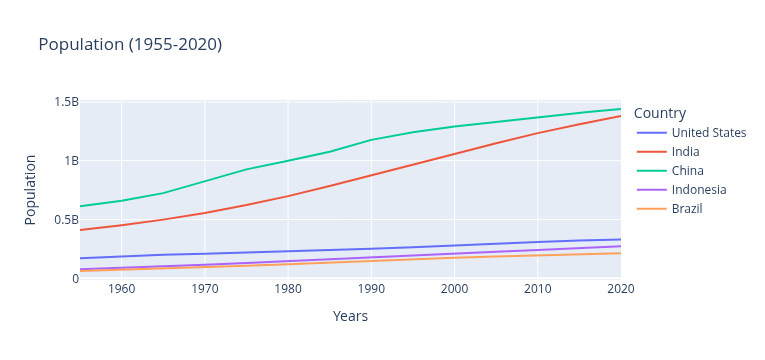

In [16]:
import plotly.express as px

# Reset index to make Year a column
df_plot = df_pivot.reset_index()

# Melt the DataFrame for plotly express
df_melted = df_plot.melt(id_vars=df_plot.columns[0], 
                          var_name='Country', 
                          value_name='Population')

# Create the line plot
fig = px.line(df_melted, 
              x=df_plot.columns[0],  # Year column
              y='Population', 
              color='Country',
              title='Population (1955-2020)',
              labels={df_plot.columns[0]: 'Years', 'Population': 'Population'})

fig.show()